In [1]:
import math
import tensorflow as tf
from sklearn.mixture import GaussianMixture


from models import Autoencoder, VaDE
from utils import *

2024-05-30 00:46:17.843952: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 00:46:20.087322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
original_dim = 784
latent_dim = 10
n_clusters = 10
x_train, y_train, x_test, y_test = get_data()
vade = VaDE(original_dim, latent_dim, n_clusters)

2024-05-30 00:46:25.457291: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 00:46:25.768676: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 00:46:25.768799: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 00:46:25.774822: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 00:46:25.774935: I external/local_xla/xla/stream_executor

In [3]:
reconstruction, z_mean, z_log_var, z = vade(x_train)

In [7]:
vade.layers[0].weights

[<KerasVariable shape=(784, 512), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(512, 512), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential/dense_1/bias>,
 <KerasVariable shape=(512, 2048), dtype=float32, path=sequential/dense_2/kernel>,
 <KerasVariable shape=(2048,), dtype=float32, path=sequential/dense_2/bias>]

In [14]:
vade.layers[3].weights, vade.layers[4].weights

([<KerasVariable shape=(2048, 10), dtype=float32, path=va_de/dense_7/kernel>,
  <KerasVariable shape=(10,), dtype=float32, path=va_de/dense_7/bias>],
 [<KerasVariable shape=(2048, 10), dtype=float32, path=va_de/dense_8/kernel>,
  <KerasVariable shape=(10,), dtype=float32, path=va_de/dense_8/bias>])

In [15]:
vade.layers[1].weights

[<KerasVariable shape=(10, 2048), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(2048,), dtype=float32, path=sequential_1/dense_3/bias>,
 <KerasVariable shape=(2048, 512), dtype=float32, path=sequential_1/dense_4/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_1/dense_4/bias>,
 <KerasVariable shape=(512, 512), dtype=float32, path=sequential_1/dense_5/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=sequential_1/dense_5/bias>,
 <KerasVariable shape=(512, 784), dtype=float32, path=sequential_1/dense_6/kernel>,
 <KerasVariable shape=(784,), dtype=float32, path=sequential_1/dense_6/bias>]

In [8]:
cd = [784, 512, 512, 2048]
for i in range(len(cd)-1):
    print(cd[i], cd[i+1])
    if i != len(cd)-2:
        print("relu")


784 512
relu
512 512
relu
512 2048


In [9]:
cd = cd[::-1]

In [10]:
for i in range(len(cd)-1):
    if i != 0:
        print("relu")
    print(cd[i], cd[i+1])

2048 512
relu
512 512
relu
512 784


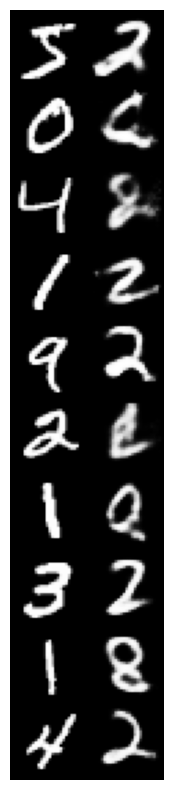

In [96]:
import matplotlib.pyplot as plt
n = 10
digit_size = (np.sqrt(original_dim)).astype('int')
fig = plt.figure(figsize=(10, 10))
figure = np.zeros((digit_size * n, digit_size * 2))
decoded = vade.decoder(gen_samples).numpy()

for i in range(10):
    figure[i * digit_size: (i + 1) * digit_size, :digit_size] = x_train[i, :].reshape(digit_size, digit_size)
    figure[i * digit_size: (i + 1) * digit_size, digit_size:] = decoded[i, :].reshape(digit_size, digit_size)
    

plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
z_embed = tsne.fit_transform(z)

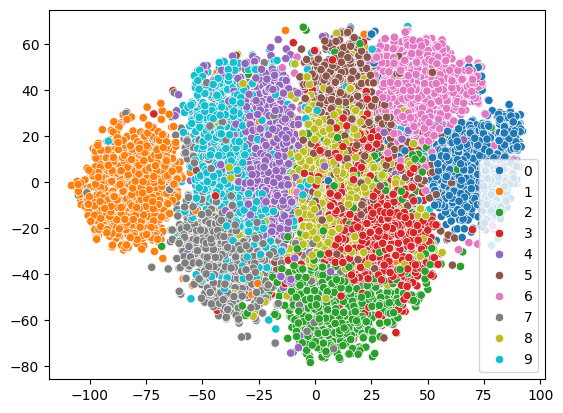

In [8]:
import seaborn as sns
N=10000
sns.scatterplot(x=z_embed[:N,0], y=z_embed[:N,1], hue=y_test[:N], palette=sns.color_palette("tab10"))
plt.show()